k-Nearest Neighbors (KNN) is a simple and effective algorithm used for classification and regression tasks in machine learning. It is a type of instance-based learning or lazy learning, where the model is not explicitly trained during the training phase. Instead, the algorithm memorizes the training dataset and makes predictions by comparing new instances to the existing dataset.
We'll be using k-NN on the diabetes dataset to determine if a patient has chances of diabetes or not.

In [46]:
#importing the necessay packages:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv("diabetes.csv")#Reading the CSV file
df=df.dropna()#Dropping empty columns(if any)

In [48]:
X=df.drop('Outcome',axis=1)#Prepration for splitting train and test
y=df['Outcome']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#Splitting train and test

In [50]:
scaler = StandardScaler()#Standardazitaion
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
knn_model = KNeighborsClassifier(n_neighbors=3)#Model fitting
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
y_pred = knn_model.predict(X_test_scaled)#Prediction

In [53]:
accuracy = accuracy_score(y_test, y_pred)#Printing Metrics
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy*100)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 70.77922077922078

Confusion Matrix:
 [[81 18]
 [27 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.61      0.51      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



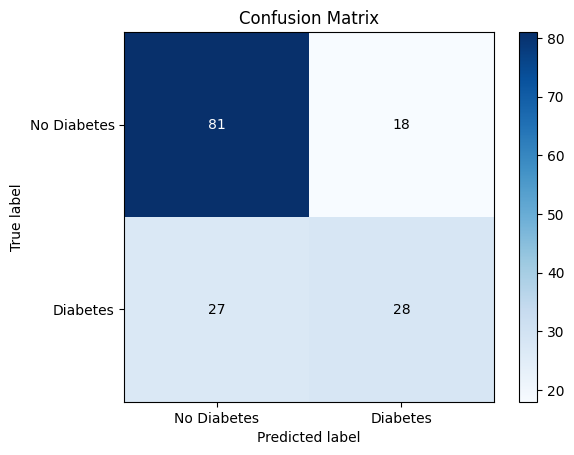

In [54]:
#Visualization of Confusion Matrix:
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['No Diabetes', 'Diabetes'],
       yticklabels=['No Diabetes', 'Diabetes'],
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show(block="True")